# Packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Tests
from scipy.stats import chi2_contingency

# Others
import os

# Setting parameters
sns.set_palette("dark")
sns.set_style("whitegrid")

os.chdir(r'J:\Estudo\Projetos\telecom_churn_prediction')

pd.set_option('display.max_columns', 25)

# Data Overview

## Importing 

In [2]:
df = pd.read_csv(r'data\telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
rows, columns = df.shape

print(f'There are {rows} rows, and {columns} columns')

There are 7043 rows, and 21 columns


## Missing values
- There are no missing values

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Analysis on each column

## Qualitative Variables
1. gender
2. SeniorCitizen
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod

### Gender
- Desc: The customer’s gender: Male, Female
- Dtype: String
- Obs:
    - Looks like gender doesn't affect it 

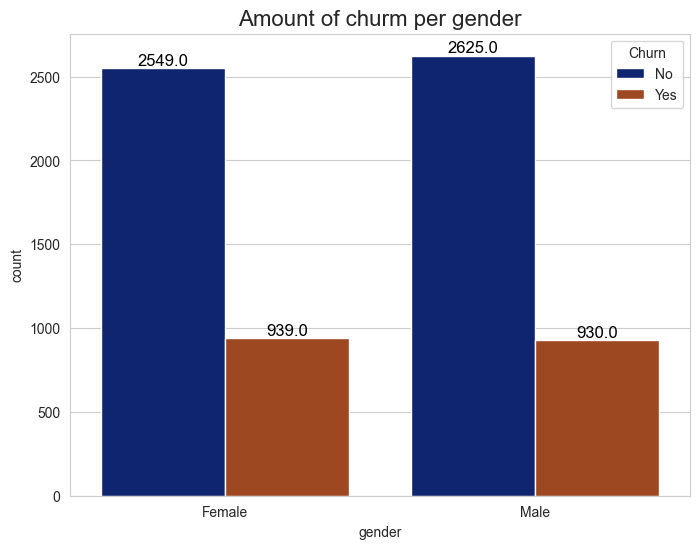

In [19]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(
    x = 'gender',
    data = df,
    hue = 'Churn'
)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black'
    )

plt.title('Amount of churm per gender', fontsize = 16)
plt.show()

- H0: There is no significant association or dependence between customer gender and churn.
- H1: There is a significant association between customer gender and churn.

In [20]:
df_cross = pd.crosstab(df['Churn'], df['gender'])
display(df_cross)

p_value = chi2_contingency(df_cross)[1]

significance = 0.05
if p_value < significance:
    print(f'There is a significant association between customer gender and churn, \nconsidering a significance of {significance} and a p-value of {p_value:.2e}')
else:
    print(f'There is no significant association or dependence between customer gender and churn, \nconsidering a significance of {significance} and a p-value of {p_value:.2e}')

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


There is no significant association or dependence between customer gender and churn, 
considering a significance of 0.05 and a p-value of 4.87e-01


In [78]:
# Creating a function to simplify this process
def check_qualitative_variable(variable : str, data : pd.DataFrame, significance : float = 0.05, primary_variable : str = 'Churn'):
    df_cross = pd.crosstab(data[primary_variable], data[variable])

    p_value = chi2_contingency(df_cross)[1]

    if p_value < significance:
        title = f'There is a significant association between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.2e}'
    else:
        title = f'There is no significant association or dependence between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.2e}'

    plt.figure(figsize = (8, 7))
    ax = sns.countplot(
        x = variable,
        data = data,
        hue = primary_variable
    )
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}', 
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=12, color='black'
        )

    plt.suptitle(f'Amount of {primary_variable} per {variable}', fontsize = 16)
    plt.title(title, fontsize = 12, y = 1)
    plt.show()

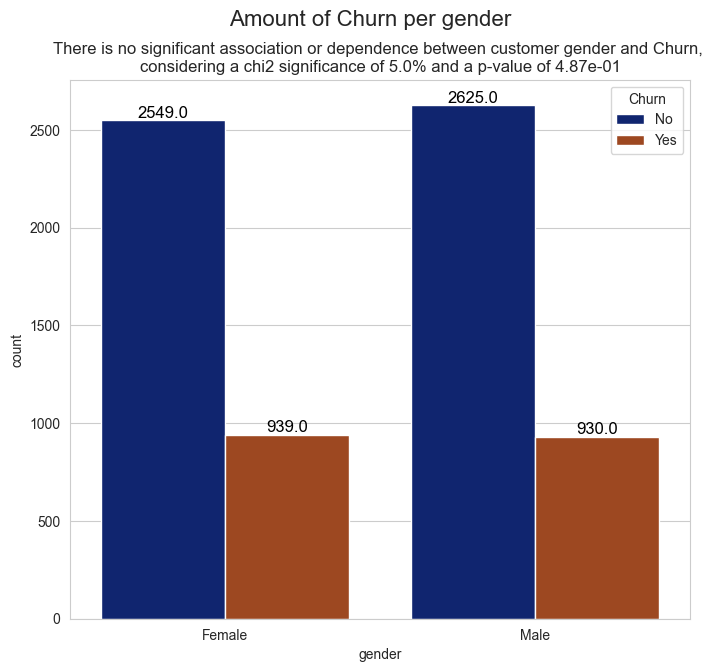

In [79]:
# Testing
check_qualitative_variable(variable = 'gender', data = df)

### Senior Citizen
- Desc: Indicates if the customer is 65 or older: Yes, No
- Dtype: String
- Obs:
    - Looks like gender doesn't affect it 

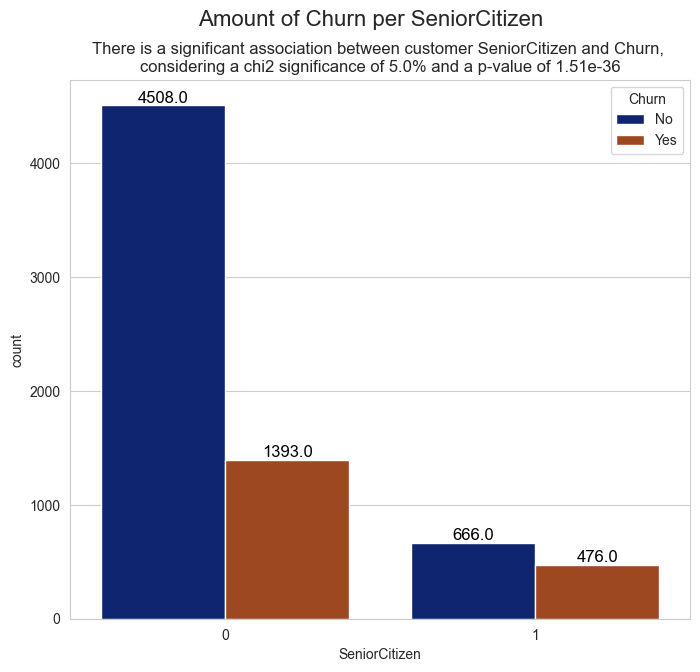

In [73]:
check_qualitative_variable(variable = 'SeniorCitizen', data = df)